In [186]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [69]:
data = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Ict\\data_sets\\heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* age: Age of the individual
* sex: Gender of the individual (0 = female, 1 = male)
* chest pain type: Type of chest pain (4 categories: 0-3)
* resting blood pressure: Resting blood pressure (in mm Hg)
* serum cholesterol: Cholesterol level (in mg/dl)y 
* fasting blood sugar: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
* resting electrocardiographic results: ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable/definite left ventricular hypertrophy)
maximum heart rate achieved
* exercise induced angina: Exercise-induced chest pain (1 = yes, 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment (0-2)
* number of major vessels: Number of major vessels (0-3) colored by fluoroscopy
* thal: Type of thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)
* target: Presence of heart disease (1 = Yes, 0 = No)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [74]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [76]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [78]:
data.shape

(1025, 14)

In [80]:
data.duplicated().sum()


723

In [82]:
data.columns.duplicated().sum()

0

In [84]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [95]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [93]:
# for col in columns:
#     print("Count-value for ",col,df[])

## Outlier Handling

In [117]:
num_df = data[["age", "trestbps", "chol", "thalach", "oldpeak", "slope", "ca"]]
num_df

,age,trestbps,chol,thalach,oldpeak,slope,ca
0,52,125,212,168,1.0,2,2
1,53,140,203,155,3.1,0,0
2,70,145,174,125,2.6,0,0
3,61,148,203,161,0.0,2,1
4,62,138,294,106,1.9,1,3
...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,2,0
1021,60,125,258,141,2.8,1,1
1022,47,110,275,118,1.0,1,1
1023,50,110,254,159,0.0,2,0


In [119]:
cat_df = data[["sex", "cp", "fbs", "restecg", "exang", "thal", "target"]]
cat_df

,sex,cp,fbs,restecg,exang,thal,target
0,1,0,0,1,0,3,0
1,1,0,1,0,1,3,0
2,1,0,0,1,1,3,0
3,1,0,0,1,0,3,0
4,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...
1020,1,1,0,1,1,2,1
1021,1,0,0,0,1,3,0
1022,1,0,0,0,1,2,0
1023,0,0,0,0,0,2,1


In [121]:
print('Numerical columns are')
num_cols=num_df.columns.tolist()
print(num_cols)

Numerical columns are
['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']


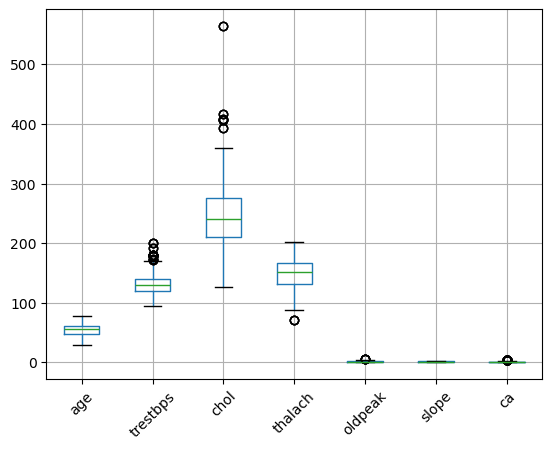

In [127]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [135]:
def remove_outliers (df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    df[column_name] =   df[column_name].clip(upper = upper_bound)
    df[column_name] =   df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [145]:
warnings.filterwarnings("ignore")

In [147]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

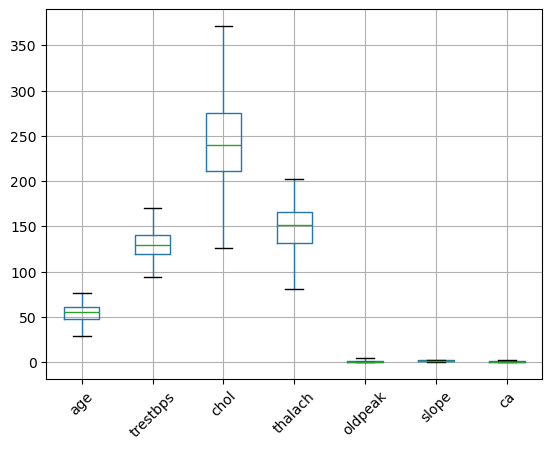

In [149]:
num_df.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [151]:
data = pd.concat([num_df,cat_df], axis = 1)

In [153]:
data

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,125,212,168,1.0,2,2.0,1,0,0,1,0,3,0
1,53,140,203,155,3.1,0,0.0,1,0,1,0,1,3,0
2,70,145,174,125,2.6,0,0.0,1,0,0,1,1,3,0
3,61,148,203,161,0.0,2,1.0,1,0,0,1,0,3,0
4,62,138,294,106,1.9,1,2.5,0,0,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,2,0.0,1,1,0,1,1,2,1
1021,60,125,258,141,2.8,1,1.0,1,0,0,0,1,3,0
1022,47,110,275,118,1.0,1,1.0,1,0,0,0,1,2,0
1023,50,110,254,159,0.0,2,0.0,0,0,0,0,0,2,1


## Scaling

In [156]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler= StandardScaler()
min_max = MinMaxScaler()

In [158]:
data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'sex',
       'cp', 'fbs', 'restecg', 'exang', 'thal', 'target'],
      dtype='object')

In [160]:
numerical_cols = ['trestbps','chol','thalach','oldpeak']

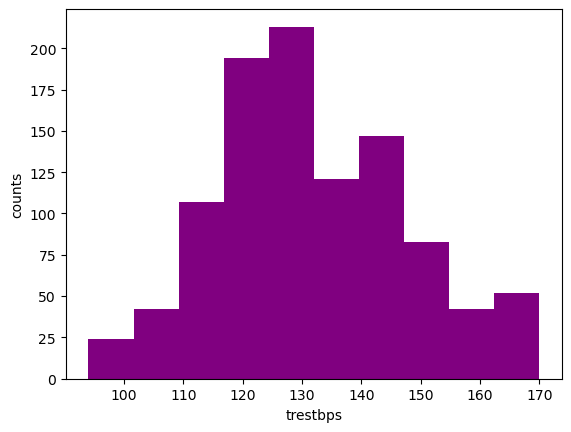

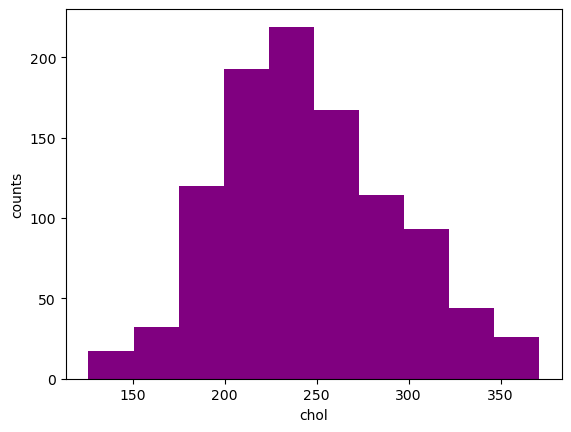

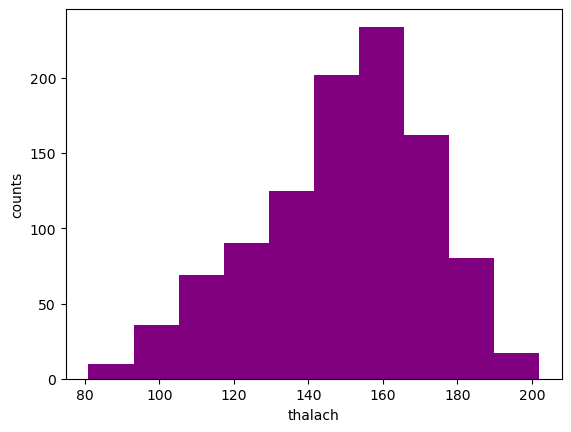

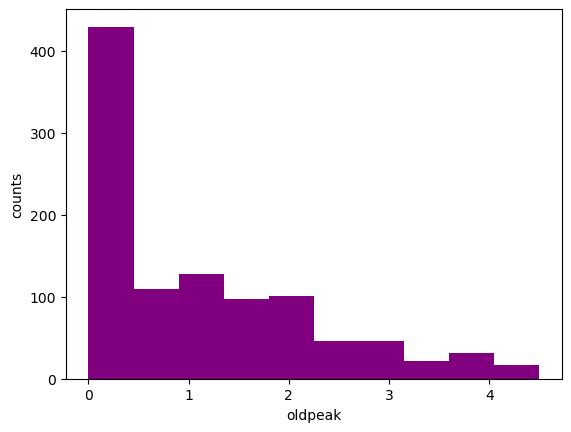

In [176]:
for col in numerical_cols :
    plt.hist(num_df[col],color='purple')
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.show()

In [164]:
std_cols = ['trestbps','chol']

In [168]:
data[std_cols]= std_scaler.fit_transform(data[std_cols])
data.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,-0.378869,-0.691104,168,1.0,2,2.0,1,0,0,1,0,3,0
1,53,0.528894,-0.879693,155,3.1,0,0.0,1,0,1,0,1,3,0
2,70,0.831481,-1.487368,125,2.6,0,0.0,1,0,0,1,1,3,0
3,61,1.013034,-0.879693,161,0.0,2,1.0,1,0,0,1,0,3,0
4,62,0.407859,1.027150,106,1.9,1,2.5,0,0,1,1,0,2,0


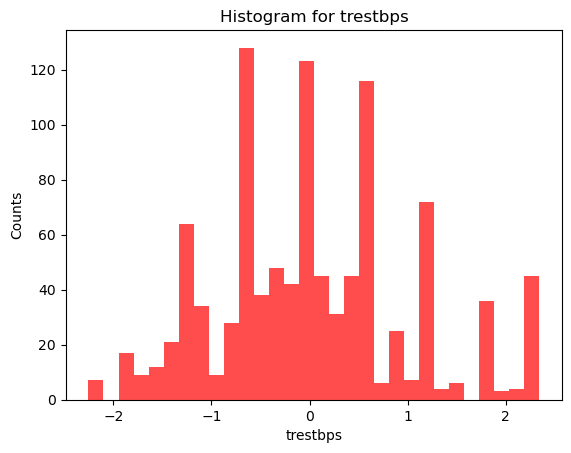

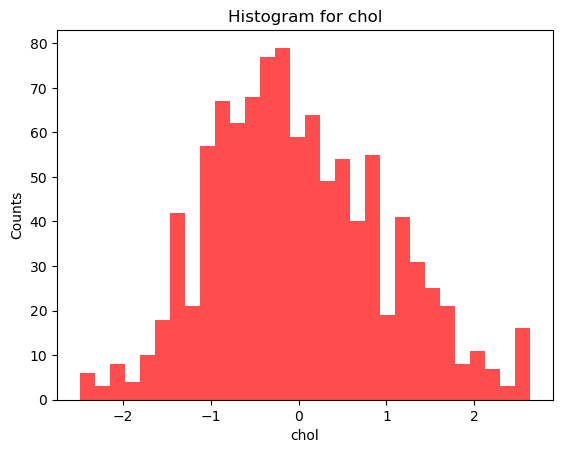

In [174]:
for col in std_cols:
    plt.hist(data[col], bins=30, color='red', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f"Histogram for {col}")
    plt.show()

In [178]:
min_cols = ['thalach','oldpeak']

In [180]:
data[min_cols] = min_max.fit_transform(data[min_cols])
data.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex,cp,fbs,restecg,exang,thal,target
0,52,-0.378869,-0.691104,0.719008,0.222222,2,2.0,1,0,0,1,0,3,0
1,53,0.528894,-0.879693,0.611570,0.688889,0,0.0,1,0,1,0,1,3,0
2,70,0.831481,-1.487368,0.363636,0.577778,0,0.0,1,0,0,1,1,3,0
3,61,1.013034,-0.879693,0.661157,0.000000,2,1.0,1,0,0,1,0,3,0
4,62,0.407859,1.027150,0.206612,0.422222,1,2.5,0,0,1,1,0,2,0


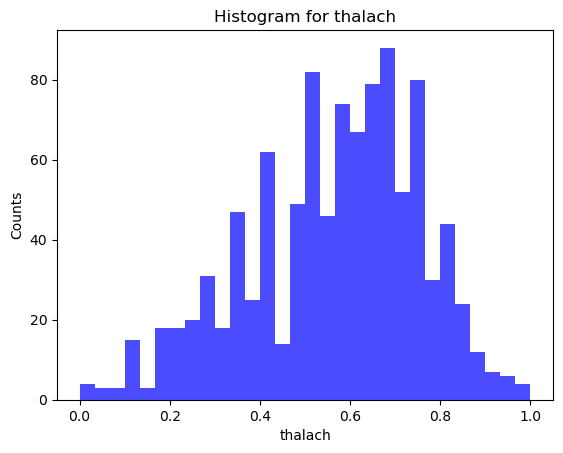

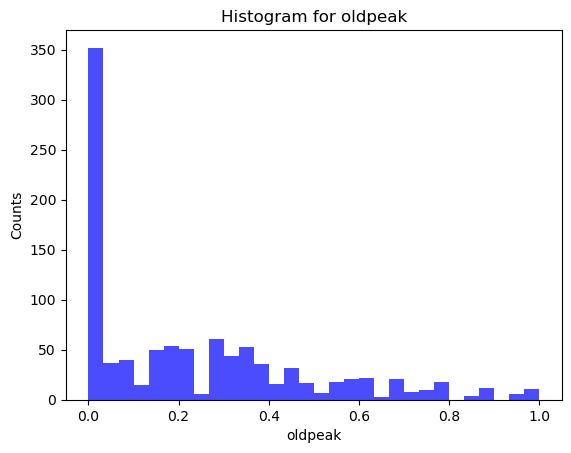

In [182]:
for col in min_cols:
    plt.hist(data[col], bins=30, color='blue', alpha=0.7)  # Accessing the column from the DataFrame
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.title(f"Histogram for {col}")
    plt.show()

<Figure size 1200x800 with 0 Axes>

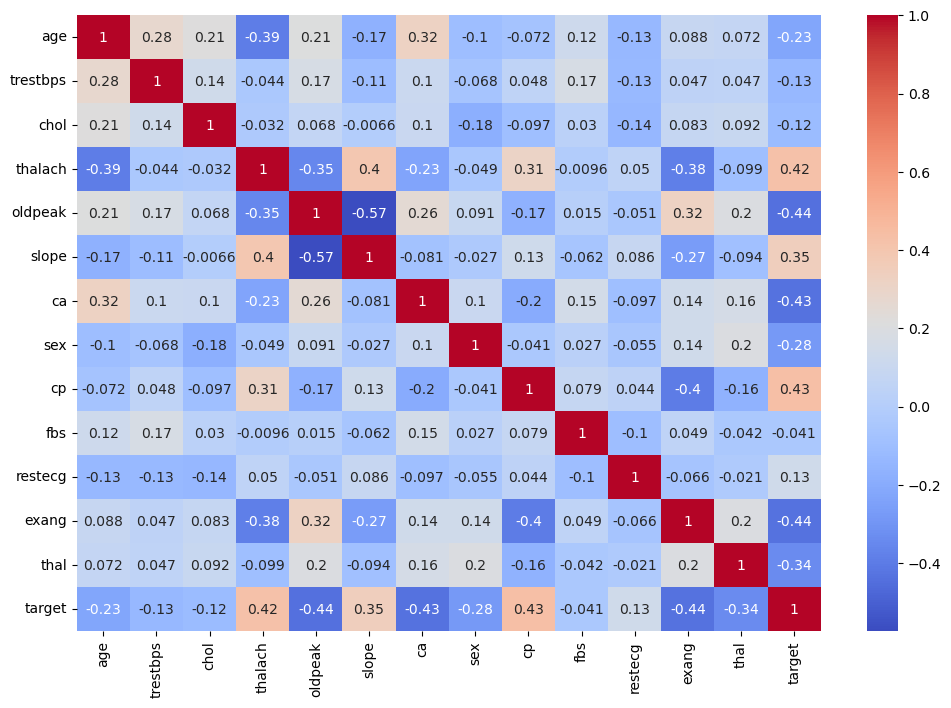

In [188]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot =True, cmap = 'coolwarm')
plt.show()

## train test split 

In [191]:
y= data['chol']
X = data.drop("chol",axis = 1)

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 24)

## Regression

In [259]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [261]:
model=LinearRegression()

In [263]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [265]:
mse = mean_squared_error( y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Squared Error 0.13184121099258994
R2 score : 0.4720786526697458


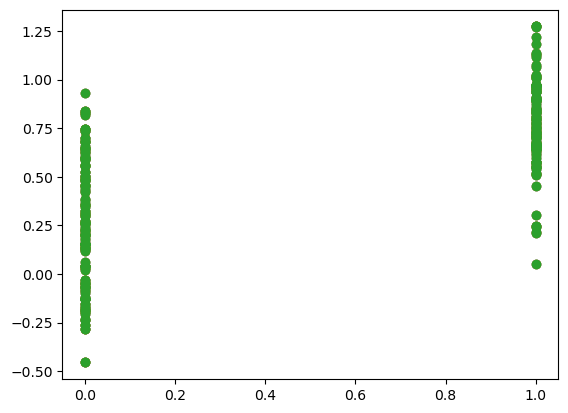

In [270]:
plt.scatter(y_test, y_pred)
plt.show()

## logistics regression

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score

In [275]:
y= data['target']
X = data.drop("target",axis = 1)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [279]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [281]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.827922077922078
precision: 0.8382513607282507
recall: 0.827922077922078
f1_score: 0.8284654149377736


## KNN

In [284]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_Knn = knn.predict(X_test)

In [286]:
print('accuracy:',accuracy_score(y_pred_Knn,y_test))
print('precision:',precision_score(y_pred_Knn,y_test,average='weighted'))
print('recall:',recall_score(y_pred_Knn,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred_Knn,y_test,average='weighted'))

accuracy: 0.8668831168831169
precision: 0.868113925667427
recall: 0.8668831168831169
f1_score: 0.8670506126176228


## Naive Bayes

In [289]:
from sklearn.naive_bayes import GaussianNB

In [291]:
classifier = GaussianNB()

In [293]:
classifier.fit(X_train, y_train)

GaussianNB()

In [295]:
y_pred = classifier.predict(X_test)

In [297]:
print('accuracy:',accuracy_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test,average='weighted'))
print('recall:',recall_score(y_pred,y_test,average='weighted'))
print('f1_score:',f1_score(y_pred,y_test,average='weighted'))

accuracy: 0.827922077922078
precision: 0.8402048122828166
recall: 0.827922077922078
f1_score: 0.8286039238923356
